In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#importin the scipy library for ttest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import warnings  
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [3]:
pd.options.display.max_columns = None

# Read the data

In [4]:
#reading the data file 

file=pd.read_csv("UCI_Credit_Card.csv")

# Descriptive Statistics

In [5]:
#first few rows of credit card dataset

file.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
file.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [7]:
#seeing the names of varibales in the dataset

file.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
#seeing the dimension of the file

file.shape

(30000, 25)

In [9]:
file.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Univariate & Bivariate Outlier Detection

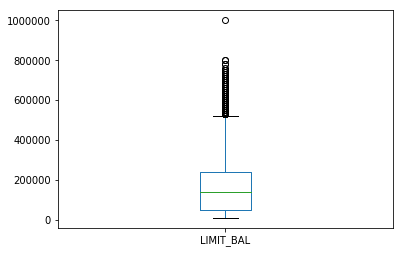

In [10]:
file['LIMIT_BAL'].plot.box()

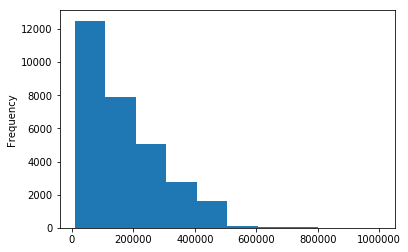

In [11]:
file['LIMIT_BAL'].plot.hist()

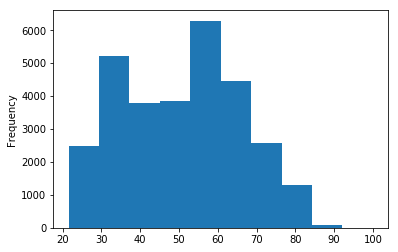

In [12]:
np.power(file['LIMIT_BAL'],1/3).plot.hist()

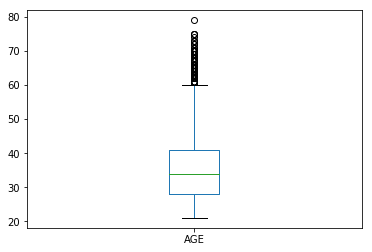

In [13]:
file['AGE'].plot.box()

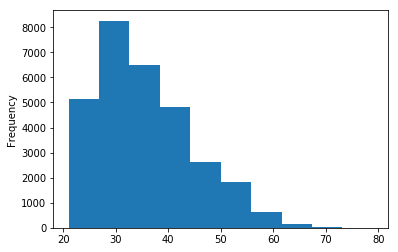

In [14]:
file['AGE'].plot.hist()

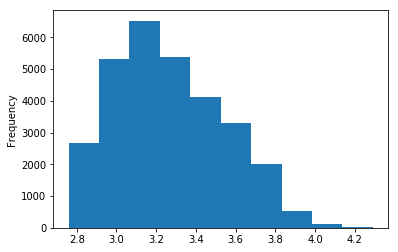

In [15]:
np.power(file['AGE'],1/3).plot.hist()

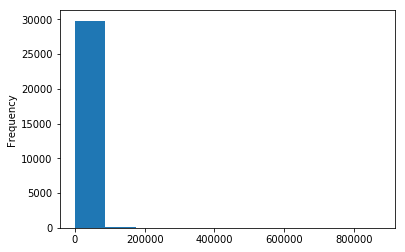

In [16]:
file['PAY_AMT1'].plot.hist()

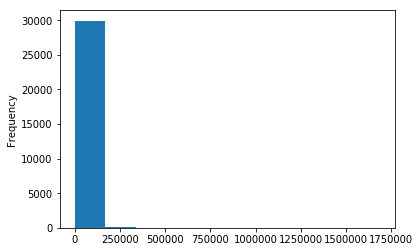

In [17]:
file['PAY_AMT2'].plot.hist()

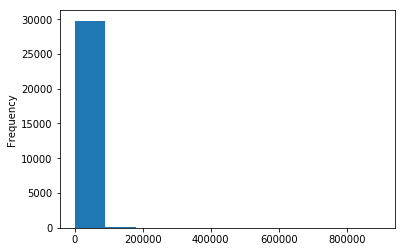

In [18]:
file['PAY_AMT3'].plot.hist()

### The above 3 graph shows that the bill payment previously done shows almost same trend. So we can safely assume that past all 6 month the trend has been same

# SEX: Gender (1=male, 2=female)

In [19]:
file['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

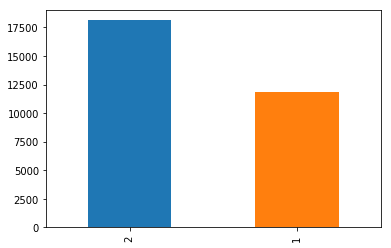

In [20]:
file['SEX'].value_counts().plot.bar()

# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [21]:
file['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

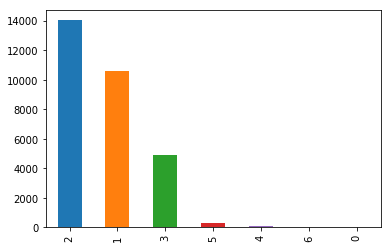

In [22]:
file['EDUCATION'].value_counts().plot.bar()

# MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [23]:
file['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

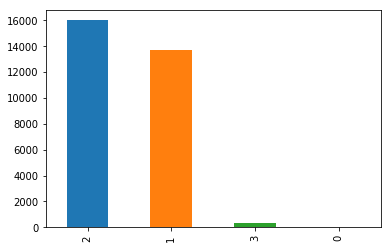

In [24]:
file['MARRIAGE'].value_counts().plot.bar()

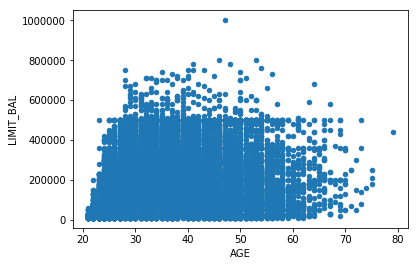

In [25]:
file.plot.scatter('AGE', 'LIMIT_BAL')

In [26]:
file=file[file['LIMIT_BAL']<600000]

In [27]:
file.loc[file['AGE']>70, 'AGE']=np.mean(file['AGE'])

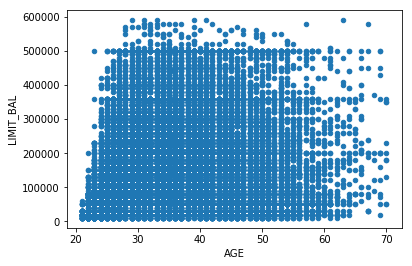

In [28]:
file.plot.scatter('AGE', 'LIMIT_BAL')

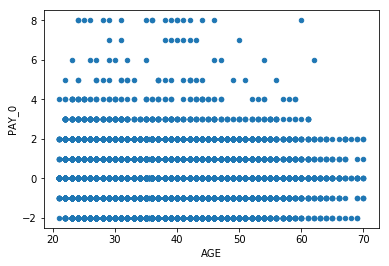

In [29]:
file.plot.scatter('AGE', 'PAY_0')

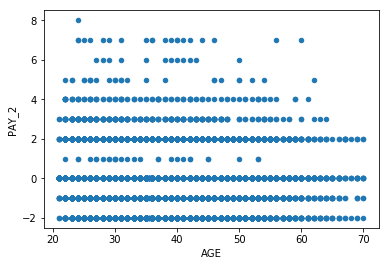

In [30]:
file.plot.scatter('AGE', 'PAY_2')

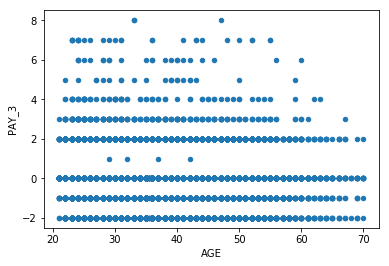

In [31]:
file.plot.scatter('AGE', 'PAY_3')

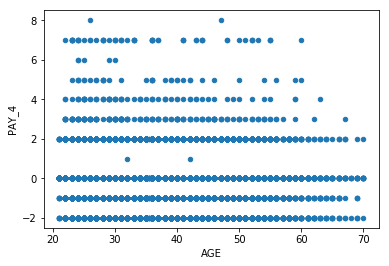

In [32]:
file.plot.scatter('AGE', 'PAY_4')

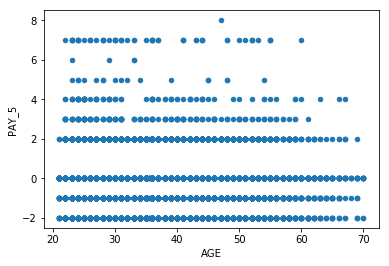

In [33]:
file.plot.scatter('AGE', 'PAY_5')

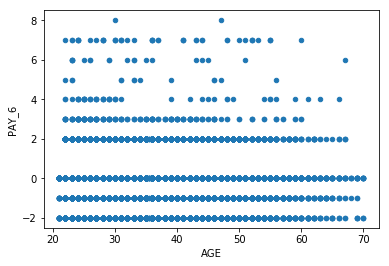

In [34]:
file.plot.scatter('AGE', 'PAY_6')

# Checking for missing values

In [35]:
file.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Replacing

In [36]:
file = file.replace({'SEX' : [1,2],'MARRIAGE' : [1,2,3,0],'EDUCATION' : [0,1,2,3,4,5,6]},
         {'SEX' : ['Male','Female'], 'MARRIAGE' : ['Married','Single','Others','Others'],
          'EDUCATION' : ['Unknown','Graduate school','University','High school','Others','Unknown','Unknown']})

In [37]:
file.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis

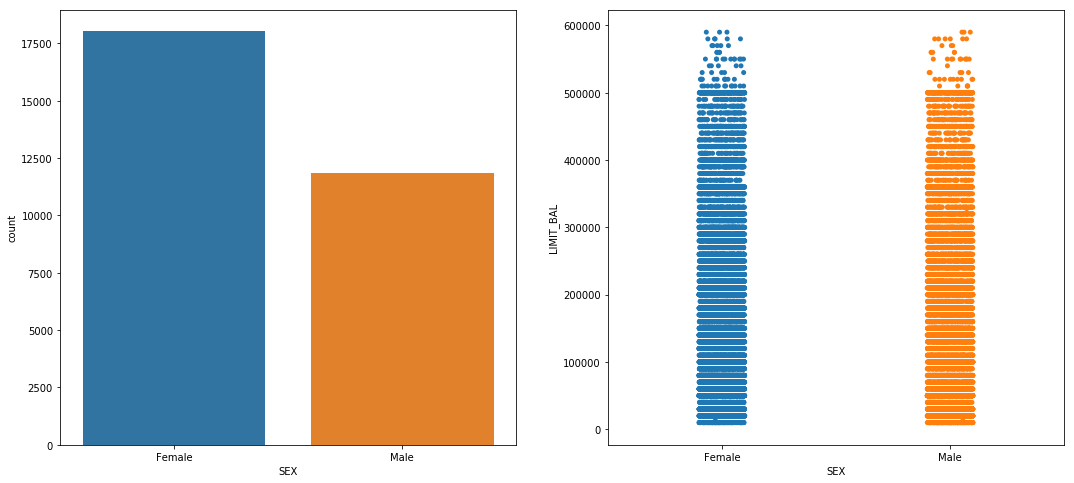

In [38]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sn.countplot(x='SEX',data=file,ax=ax[0])
sn.stripplot(x='SEX',y='LIMIT_BAL',data=file,ax=ax[1])

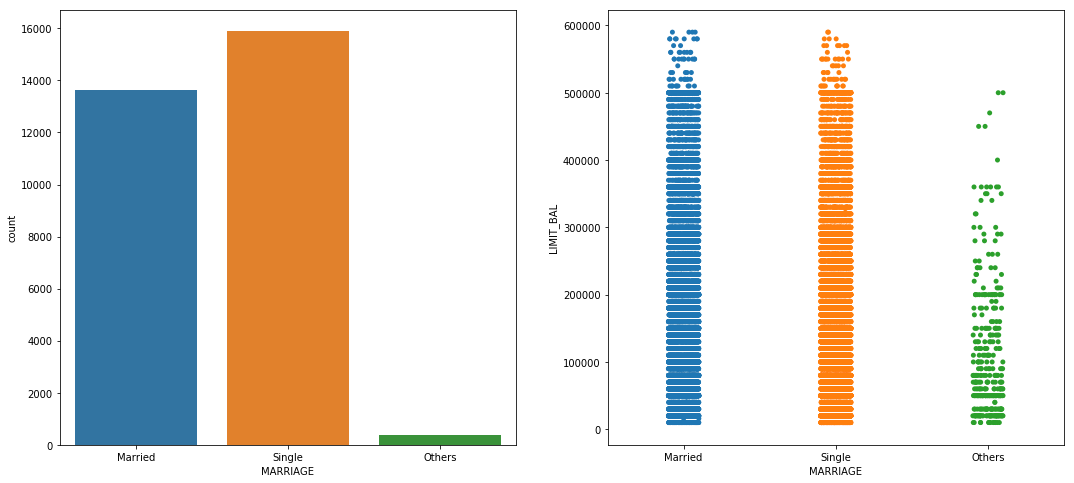

In [39]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sn.countplot(x='MARRIAGE',data=file,ax=ax[0])
sn.stripplot(x='MARRIAGE',y='LIMIT_BAL',data=file,ax=ax[1])

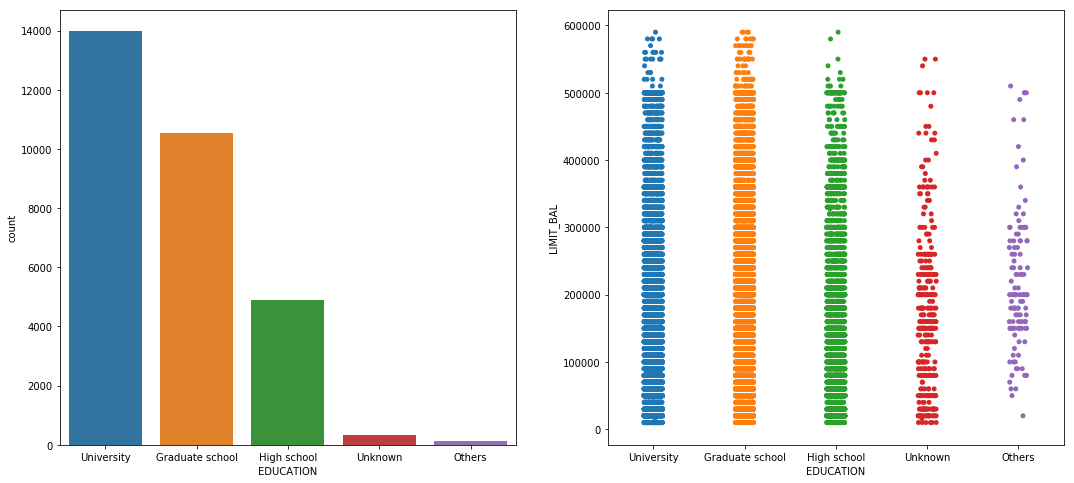

In [40]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sn.countplot(x='EDUCATION',data=file,ax=ax[0])
sn.stripplot(x='EDUCATION',y='LIMIT_BAL',data=file,ax=ax[1])

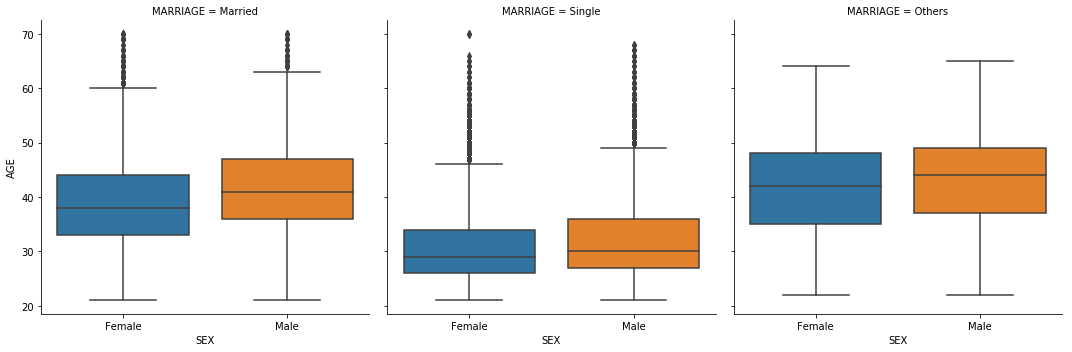

In [41]:
sn.catplot(x='SEX',y='AGE',col='MARRIAGE',data=file,kind='box')

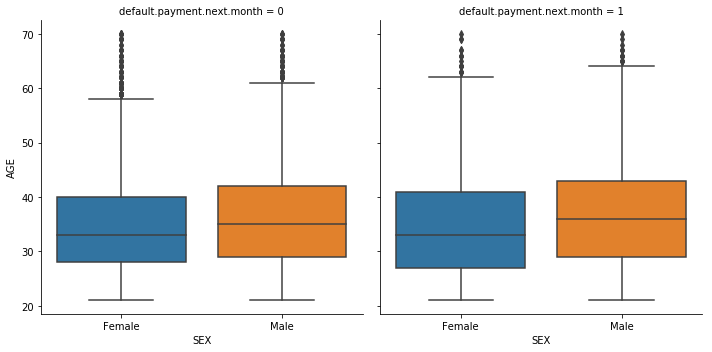

In [42]:
sn.catplot(x='SEX',y='AGE',col='default.payment.next.month',data=file,kind='box')

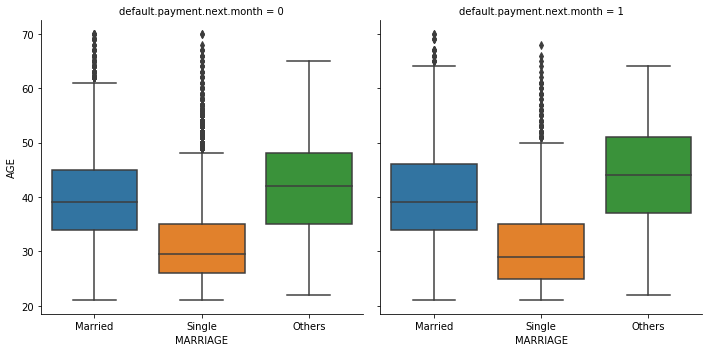

In [43]:
sn.catplot(x='MARRIAGE',y='AGE',col='default.payment.next.month',data=file,kind='box')

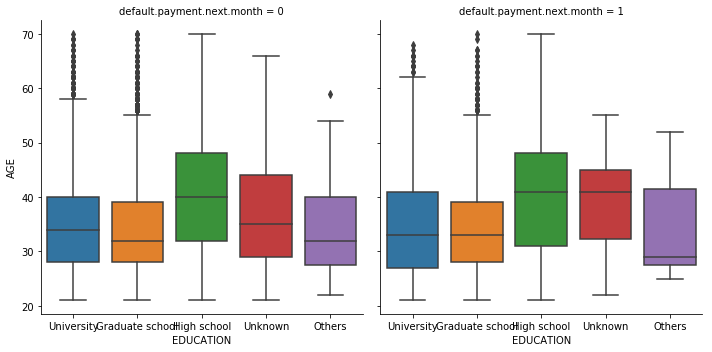

In [44]:
sn.catplot(x='EDUCATION',y='AGE',col='default.payment.next.month',data=file,kind='box')

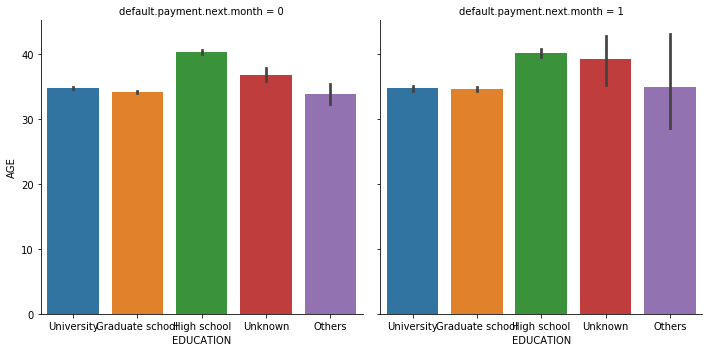

In [45]:
sn.catplot(x='EDUCATION', y='AGE',col= 'default.payment.next.month',data=file, kind = 'bar')

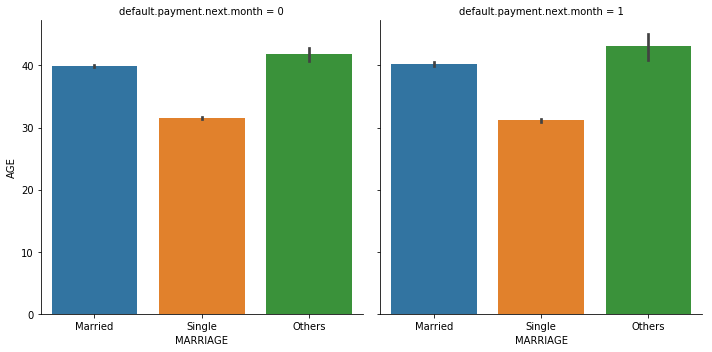

In [48]:
sn.catplot(x='MARRIAGE',y='AGE',col='default.payment.next.month',data=file,kind='bar')

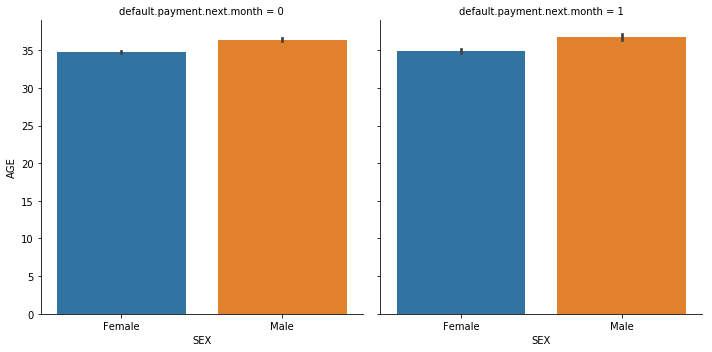

In [52]:
sn.catplot(x='SEX',y='AGE',col='default.payment.next.month',data=file,kind='bar')

# Percentage of 1's and 0's

In [48]:
#create percentage from frequencies 

file['default.payment.next.month'].value_counts()/len(file['default.payment.next.month'])

0    0.778398
1    0.221602
Name: default.payment.next.month, dtype: float64

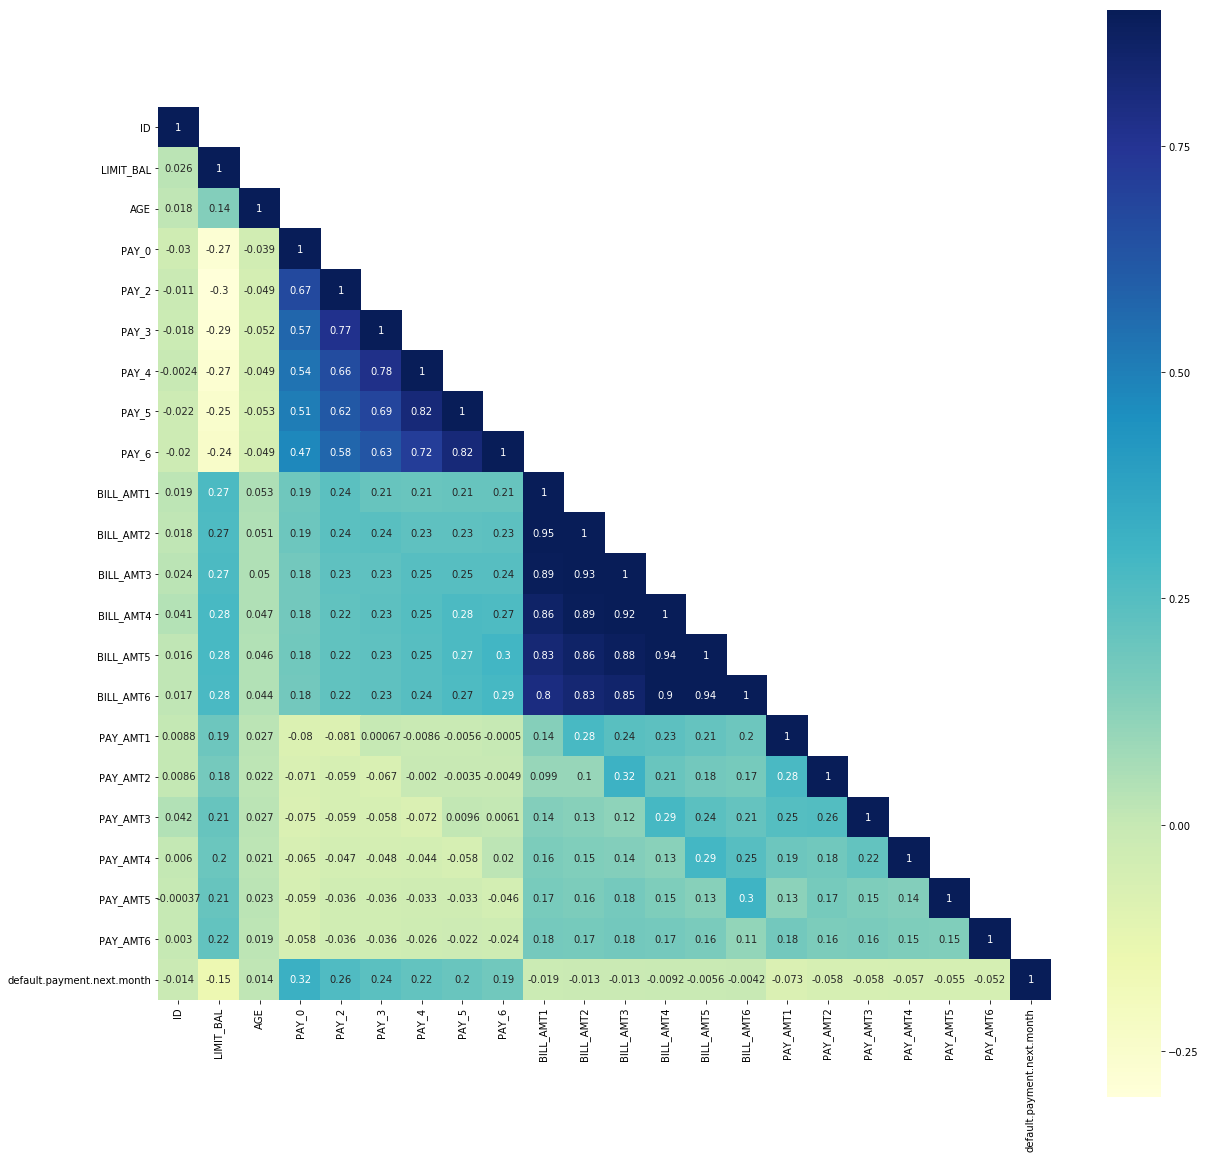

In [49]:
# looking at the correlation between numerical variables
corr = file.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Categorical - Continuous Bivariate Analysis

In [50]:
male=file[file['SEX']=='Male']

In [51]:
female=file[file['SEX']=='Female']

In [52]:
ttest_ind(male['AGE'],female['AGE'],nan_policy='omit')

Ttest_indResult(statistic=15.643554627924019, pvalue=6.073430809019469e-55)

# Categorical - Categorical Bivariate Analysis

In [53]:
pd.crosstab(file['SEX'],file['default.payment.next.month'])

default.payment.next.month,0,1
SEX,,
Female,14300,3758
Male,8978,2869


In [54]:
chi2_contingency(pd.crosstab(file['SEX'],file['default.payment.next.month']))

(47.92492679794972,
 4.428553647260431e-12,
 1,
 array([[14056.31580003,  4001.68419997],
        [ 9221.68419997,  2625.31580003]]))

In [55]:
pd.crosstab(file['MARRIAGE'],file['default.payment.next.month'])

default.payment.next.month,0,1
MARRIAGE,,
Married,10416,3199
Others,288,89
Single,12574,3339


In [56]:
chi2_contingency(pd.crosstab(file['MARRIAGE'],file['default.payment.next.month']))

(27.33248246106503,
 1.160985632384182e-06,
 2,
 array([[10597.8923257 ,  3017.1076743 ],
        [  293.45614446,    83.54385554],
        [12386.65152984,  3526.34847016]]))

In [57]:
pd.crosstab(file['EDUCATION'],file['default.payment.next.month'])

default.payment.next.month,0,1
EDUCATION,,
Graduate school,8503,2031
High school,3668,1237
Others,115,7
University,10673,3326
Unknown,319,26


In [58]:
chi2_contingency(pd.crosstab(file['EDUCATION'],file['default.payment.next.month']))

(159.84199169910852,
 1.580569994613698e-33,
 4,
 array([[ 8199.64728306,  2334.35271694],
        [ 3818.04347099,  1086.95652901],
        [   94.96458786,    27.03541214],
        [10896.79725798,  3102.20274202],
        [  268.5474001 ,    76.4525999 ]]))

### MANIPULATION OF DATA

In [59]:
file['PAY_0'][file['PAY_0'] <= 0] = 0
file['PAY_0'][(file['PAY_0'] > 0) & (file['PAY_0'] <= 3) ] = 1 
file['PAY_0'][file['PAY_0'] > 3 ] = 2
file['PAY_2'][file['PAY_2'] <= 0] = 0
file['PAY_2'][(file['PAY_2'] > 0) & (file['PAY_2'] <= 3) ] = 1 
file['PAY_2'][file['PAY_2'] > 3 ] = 2
file['PAY_3'][file['PAY_3'] <= 0] = 0
file['PAY_3'][(file['PAY_3'] > 0) & (file['PAY_3'] <= 3) ] = 1 
file['PAY_3'][file['PAY_3'] > 3 ] = 2
file['PAY_4'][file['PAY_4'] <= 0] = 0
file['PAY_4'][(file['PAY_4'] > 0) & (file['PAY_4'] <= 3) ] = 1 
file['PAY_4'][file['PAY_4'] > 3 ] = 2
file['PAY_5'][file['PAY_5'] <= 0] = 0
file['PAY_5'][(file['PAY_5'] > 0) & (file['PAY_5'] <= 3) ] = 1 
file['PAY_5'][file['PAY_5'] > 3 ] = 2
file['PAY_6'][file['PAY_6'] <= 0] = 0
file['PAY_6'][(file['PAY_6'] > 0) & (file['PAY_6'] <= 3) ] = 1 
file['PAY_6'][file['PAY_6'] > 3 ] = 2
file = file.replace({'PAY_0' : [0,1,2],'PAY_2' : [0,1,2],'PAY_3' : [0,1,2],
                                     'PAY_4' : [0,1,2],'PAY_5' : [0,1,2],'PAY_6' : [0,1,2]},
                                     {'PAY_0' : ['Early','On time','Late'],'PAY_2' : ['Early','On time','Late'],
                                      'PAY_3' : ['Early','On time','Late'],'PAY_4' : ['Early','On time','Late'],
                                      'PAY_5' : ['Early','On time','Late'],'PAY_6' : ['Early','On time','Late']})

In [60]:
file.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24.0,On time,On time,Early,Early,Early,Early,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26.0,Early,On time,Early,Early,Early,On time,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34.0,Early,Early,Early,Early,Early,Early,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37.0,Early,Early,Early,Early,Early,Early,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57.0,Early,Early,Early,Early,Early,Early,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [66]:
file['TOTAL_BILL'] = [value.sum() for value in file.iloc[:,12:18].values]
file = file.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)
file['TOTAL_PAY_AMT'] = [value.sum() for value in file.iloc[:,12:18].values]
file = file.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1)

In [67]:
file.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY_AMT
0,1,20000.0,Female,University,Married,24.0,On time,On time,Early,Early,Early,Early,1,7704.0,689.0
1,2,120000.0,Female,University,Single,26.0,Early,On time,Early,Early,Early,On time,1,17077.0,5000.0
2,3,90000.0,Female,University,Single,34.0,Early,Early,Early,Early,Early,Early,0,101653.0,11018.0
3,4,50000.0,Female,University,Married,37.0,Early,Early,Early,Early,Early,Early,0,231334.0,8388.0
4,5,50000.0,Male,University,Married,57.0,Early,Early,Early,Early,Early,Early,0,109339.0,59049.0


In [68]:
file['SEX'] = le.fit_transform(file['SEX'])
educations = pd.get_dummies(file['EDUCATION'])
marriages = pd.get_dummies(file['MARRIAGE'])
pay_0 = pd.get_dummies(file['PAY_0'],prefix='PAY_0')
pay_2 = pd.get_dummies(file['PAY_2'],prefix='PAY_2')
pay_3 = pd.get_dummies(file['PAY_3'],prefix='PAY_3')
pay_4 = pd.get_dummies(file['PAY_4'],prefix='PAY_4')
pay_5 = pd.get_dummies(file['PAY_5'],prefix='PAY_5')
pay_6 = pd.get_dummies(file['PAY_6'],prefix='PAY_6')
file = pd.concat([file,educations],axis=1)
file = pd.concat([file,marriages],axis=1)
file = pd.concat([file,pay_0],axis=1)
file = pd.concat([file,pay_2],axis=1)
file = pd.concat([file,pay_3],axis=1)
file = pd.concat([file,pay_4],axis=1)
file = pd.concat([file,pay_5],axis=1)
file = pd.concat([file,pay_6],axis=1)
file = file.drop(['EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)

In [69]:
file.head(10)

,ID,LIMIT_BAL,SEX,AGE,default.payment.next.month,TOTAL_BILL,TOTAL_PAY_AMT,Graduate school,High school,Others,University,Unknown,Married,Others,Single,PAY_0_Early,PAY_0_Late,PAY_0_On time,PAY_2_Early,PAY_2_Late,PAY_2_On time,PAY_3_Early,PAY_3_Late,PAY_3_On time,PAY_4_Early,PAY_4_Late,PAY_4_On time,PAY_5_Early,PAY_5_Late,PAY_5_On time,PAY_6_Early,PAY_6_Late,PAY_6_On time
0,1,20000.0,0,24.0,1,7704.0,689.0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,2,120000.0,0,26.0,1,17077.0,5000.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
2,3,90000.0,0,34.0,0,101653.0,11018.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,4,50000.0,0,37.0,0,231334.0,8388.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,5,50000.0,1,57.0,0,109339.0,59049.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,6,50000.0,1,37.0,0,238114.0,7772.0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
6,7,500000.0,1,29.0,0,2724595.0,180759.0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7,8,100000.0,0,23.0,0,13486.0,4791.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8,9,140000.0,0,28.0,0,65212.0,6761.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
9,10,20000.0,1,35.0,0,26919.0,14129.0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


## MODELing

In [95]:
y = file.loc[: , 'default.payment.next.month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [96]:
X=file.loc[ : ,['LIMIT_BAL','SEX','AGE','TOTAL_BILL','TOTAL_PAY_AMT','Graduate school','High school','Others','University',
               'Unknown','Married','Others','Single','PAY_0_Early','PAY_0_Late','PAY_0_On time','PAY_2_Early','PAY_2_Late','PAY_2_On time',
                'PAY_3_Early','PAY_3_Late','PAY_3_On time','PAY_4_Early','PAY_4_Late','PAY_4_On time','PAY_5_Early','PAY_5_Late',
                'PAY_5_On time','PAY_6_Early','PAY_6_Late','PAY_6_On time'] ]
X.head()

,LIMIT_BAL,SEX,AGE,TOTAL_BILL,TOTAL_PAY_AMT,Graduate school,High school,Others,Others,University,Unknown,Married,Others,Others,Single,PAY_0_Early,PAY_0_Late,PAY_0_On time,PAY_2_Early,PAY_2_Late,PAY_2_On time,PAY_3_Early,PAY_3_Late,PAY_3_On time,PAY_4_Early,PAY_4_Late,PAY_4_On time,PAY_5_Early,PAY_5_Late,PAY_5_On time,PAY_6_Early,PAY_6_Late,PAY_6_On time
0,20000.0,0,24.0,7704.0,689.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,120000.0,0,26.0,17077.0,5000.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
2,90000.0,0,34.0,101653.0,11018.0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,50000.0,0,37.0,231334.0,8388.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,50000.0,1,57.0,109339.0,59049.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [100]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [105]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [106]:
cm

array([[5541,  300],
       [1150,  486]], dtype=int64)

In [108]:
a = (5541+486)/(5541+300+1150+486)
a

0.8060719539922429

## So the final test data has an accuracy of 80.60 %. Which says we can correctly predict 80 % of customer whose going to default or not.